In [257]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import pickle
import seaborn as sns
pd.set_option('display.max_columns', None)
import sys
sys.path.append('..')
sys.path.append('../..')
sys.path.append('.')
sys.path.append('./scripts')
from competing_methods_local import *
from simulations_util import *
from util import  apply_splitting_strategy
from sklearn.preprocessing import StandardScaler

In [258]:
task = "classification" #"classification" #"regression"
data = "openml_361070" 
# "openml_43" "openml_9946" "openml_9978" "openml_146819" "openml_361062" "openml_361070"
# "openml_361242" "openml_361253" "openml_361254" "openml_361259" "openml_361260" "openml_361622"

ablation_directory =f"/accounts/projects/binyu/zhongyuan_liang/local_MDI+/imodels-experiments/feature_importance/results/mdi_local.real_data_{task}_{data}/{data}_selection/varying_sample_row_n"

combined_df = pd.DataFrame()
split_seeds = [1,2,3,4,5]
rf_seeds = [1,2,3]
for split_seed in split_seeds:
    for rf_seed in rf_seeds:
        df = pd.read_csv(os.path.join(ablation_directory, f"seed_{split_seed}_{rf_seed}/results.csv"))
        combined_df = pd.concat([combined_df, df], ignore_index=True)

In [259]:
assert combined_df.columns[combined_df.isnull().any()] == ['sample_row_n']

### Summarise the Ablation Data

In [260]:
train_size = combined_df["train_size"].unique()[0]
test_size = combined_df["test_size"].unique()[0]
print(f"The training size is {train_size} and the test size is {test_size}")

The training size is 1340 and the test size is 660


In [261]:
combined_df["num_features"].unique()

array([20])

### Plot the Ablation Data Performance

In [262]:
num_features = combined_df['num_features'].drop_duplicates().values[0]
metrics = {"regression": ["R2"], "classification": ["AUROC"]} #MSE
ablation_models = {"regression": ["RF_Regressor"],#, "NN_Regressor"],
                   "classification": ["RF_Classifier"]}#, "NN_Classifier"]}

In [263]:
methods = [
    'LIME_RF',
    'MDI',
    # 'Random',
    'TreeSHAP_RF',
    # 'Local_MDI+_MDI_elasticnet_fit_on_all_ranking_RFPlus',
    # 'Local_MDI+_MDI_lasso_fit_on_all_ranking_RFPlus',
    # 'Local_MDI+_MDI_ridge_fit_on_all_ranking_RFPlus',
    # 'Local_MDI+_MDI_elasticnet_fit_on_all_ranking_bootstrap_RFPlus',
    # 'Local_MDI+_MDI_lasso_fit_on_all_ranking_bootstrap_RFPlus',
    'Local_MDI+_MDI_ridge_fit_on_all_RFPlus',
]

color_map = {
    # Core methods
    'Random': 'gray',  # Neutral color
    'LIME_RF': '#71BEB7',  # Turquoise
    'TreeSHAP_RF': 'orange',  # Distinctive orange
    'MDI': '#8B4513',  # Brown for distinction
    'Local_MDI+_MDI_ridge_fit_on_all_ranking_RFPlus': '#3357FF',  # Blue
    'Local_MDI+_MDI_ridge_fit_on_all_RFPlus': '#E91E63'
}

In [264]:
all_ratios = [0.1,0.2, 0.3, 0.4]
num_features_selected = []
for r in all_ratios:
    num_features_selected.append(combined_df[f"num_features_selected_{r}"].unique()[0])

In [265]:
num_features_selected

[2, 4, 6, 8]

In [266]:
combined_df

,sample_row_n,sample_row_n_name,rep,model,fi,train_size,test_size,num_features,data_split_seed,rf_seed,num_features_selected_0.1,RF_Classifier_AUROC_top_0.1,num_features_selected_0.2,RF_Classifier_AUROC_top_0.2,num_features_selected_0.3,RF_Classifier_AUROC_top_0.3,num_features_selected_0.4,RF_Classifier_AUROC_top_0.4,split_seed
0,NaN,keep_all_rows,0,RF,LIME_RF,1340,660,20,1,1,2,0.476023,4,0.547048,6,0.565508,8,0.570731,1
1,NaN,keep_all_rows,0,RF,Local_MDI+_MDI_ridge_fit_on_all_RFPlus,1340,660,20,1,1,2,0.529744,4,0.548995,6,0.576714,8,0.578955,1
2,NaN,keep_all_rows,0,RF,Local_MDI+_MDI_ridge_fit_on_all_ranking_RFPlus,1340,660,20,1,1,2,0.529744,4,0.580142,6,0.571053,8,0.576525,1
3,NaN,keep_all_rows,0,RF,MDI,1340,660,20,1,1,2,0.535998,4,0.536942,6,0.569387,8,0.550504,1
4,NaN,keep_all_rows,0,RF,Random,1340,660,20,1,1,2,0.599196,4,0.557095,6,0.549151,8,0.565135,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,NaN,keep_all_rows,0,RF,Local_MDI+_MDI_ridge_fit_on_all_RFPlus,1340,660,20,5,3,2,0.530979,4,0.606395,6,0.645308,8,0.631832,5
86,NaN,keep_all_rows,0,RF,Local_MDI+_MDI_ridge_fit_on_all_ranking_RFPlus,1340,660,20,5,3,2,0.529156,4,0.594374,6,0.624105,8,0.644757,5
87,NaN,keep_all_rows,0,RF,MDI,1340,660,20,5,3,2,0.514234,4,0.563161,6,0.596528,8,0.613654,5
88,NaN,keep_all_rows,0,RF,Random,1340,660,20,5,3,2,0.589044,4,0.594186,6,0.601712,8,0.598975,5


In [267]:
filtered_df = combined_df[~combined_df["fi"].isin(["Random", "Local_MDI+_MDI_ridge_fit_on_all_ranking_RFPlus"])]

# Group by 'fi' and calculate the mean of the selected columns
result = filtered_df.groupby("fi")[
    ["RF_Classifier_AUROC_top_0.1", "RF_Classifier_AUROC_top_0.2", "RF_Classifier_AUROC_top_0.3", "RF_Classifier_AUROC_top_0.4"]
].mean()

result

,RF_Classifier_AUROC_top_0.1,RF_Classifier_AUROC_top_0.2,RF_Classifier_AUROC_top_0.3,RF_Classifier_AUROC_top_0.4
fi,,,,
LIME_RF,0.516504,0.560715,0.581450,0.590183
Local_MDI+_MDI_ridge_fit_on_all_RFPlus,0.603221,0.604302,0.612185,0.619057
MDI,0.531846,0.549725,0.574359,0.583584
TreeSHAP_RF,0.531498,0.565581,0.581513,0.594294


In [268]:
# filtered_df = combined_df[~combined_df["fi"].isin(["Random", "Local_MDI+_MDI_ridge_fit_on_all_ranking_RFPlus"])]

# # Group by 'fi' and calculate the mean of the selected columns
# result = filtered_df.groupby("fi")[
#     ["RF_Regressor_R2_top_0.1", "RF_Regressor_R2_top_0.2", "RF_Regressor_R2_top_0.3", "RF_Regressor_R2_top_0.4"]
# ].mean()

# result

#### Summary of results

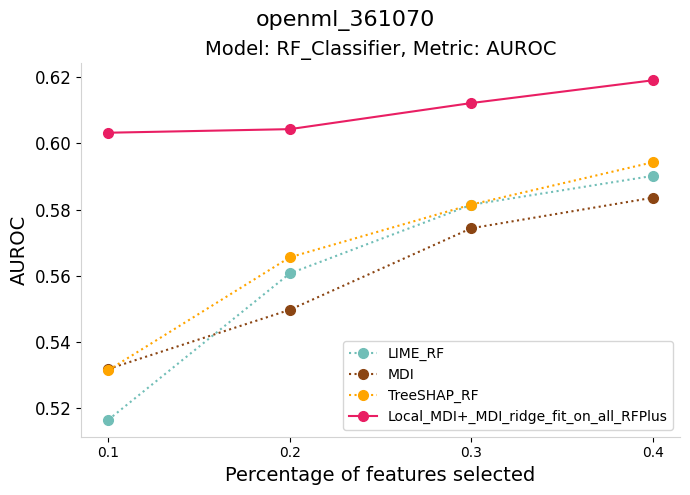

In [269]:
import matplotlib.pyplot as plt

plt.rcParams['axes.labelsize'] = 30
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.edgecolor'] = 'lightgrey'

# Define marker size
marker_size = 7

# Determine the number of rows and columns for subplots
n_models = len(ablation_models[task])
n_metrics = len(metrics[task])

# Create subplots with a single Axes
fig, ax = plt.subplots(
    nrows=1,
    ncols=1,
    figsize=(7 * n_metrics, 5 * n_models)  # Adjust figure size dynamically
)

# List of methods with dotted line style
dotted_methods = ['LIME_RF', 'TreeSHAP_RF', 'MDI']

# Initialize results for plotting
results = {m: [] for m in methods}
for m in methods:
    for k in all_ratios:
        results[m].append(
            combined_df[combined_df['fi'] == m][f"{ablation_models[task][0]}_{metrics[task][0]}_top_{k}"].mean()
        )

# Plot each method's results
for m in methods:
    color = color_map[m]
    linestyle = 'dotted' if m in dotted_methods else 'solid'
    ax.plot(
        all_ratios, results[m],
        label=m, linestyle=linestyle,
        color=color, marker='o', markersize=marker_size
    )

# Set labels, title, and ticks for the subplot
ax.set_xticks(all_ratios)
ax.set_xlabel('Percentage of features selected', fontsize=14)
ax.set_ylabel(metrics[task][0], fontsize=14)
ax.set_title(f"Model: {ablation_models[task][0]}, Metric: {metrics[task][0]}", fontsize=14)
ax.legend(fontsize=10, title_fontsize=12)

# Adjust layout and show plot
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the title
fig.suptitle(data, fontsize=16)  # Add the global title
# plt.savefig(f"results_{task}_{data}.png")
plt.show()


In [270]:
# plt.rcParams['axes.labelsize'] = 30
# plt.rcParams['xtick.labelsize'] = 10
# plt.rcParams['ytick.labelsize'] = 12
# plt.rcParams['axes.spines.right'] = False
# plt.rcParams['axes.spines.top'] = False
# plt.rcParams['axes.edgecolor'] = 'lightgrey'

# # Define marker size
# marker_size = 7

# # Determine the number of rows and columns for subplots
# n_models = len(ablation_models[task])
# n_metrics = len(metrics[task])

# # Create subplots with a grid of n_models rows and n_metrics columns
# fig, axs = plt.subplots(
#     nrows=n_models,
#     ncols=n_metrics,
#     figsize=(7 * n_metrics, 5 * n_models)  # Adjust figure size dynamically
# )

# # Ensure axs is iterable, even if there's only one subplot
# if n_models == 1 and n_metrics == 1:
#     axs = [[axs]]  # Single subplot case
# elif n_models == 1 or n_metrics == 1:
#     axs = [axs]  # Single row or column

# # List of methods with dotted line style
# dotted_methods = ['LIME_RF', 'TreeSHAP_RF', 'MDI']

# # Iterate through models and metrics
# for i, a_model in enumerate(ablation_models[task]):
#     for j, metric in enumerate(metrics[task]):
#         ax = axs[i][j] if n_models > 1 and n_metrics > 1 else axs[max(i, j)]
        
#         results = {m: [] for m in methods}
#         for m in methods:
#             for k in all_ratios:
#                 results[m].append(
#                     combined_df[combined_df['fi'] == m][f"{a_model}_{metric}_top_{k}"].mean()
#                 )
        
#         # excluded_keys = {'LIME_RF', 'TreeSHAP_RF'}
#         # filtered_sums = {
#         #     key: sum(values[:5]) 
#         #     for key, values in results.items() if key not in excluded_keys
#         # }
#         # if metric == "MSE" or metric == "LogLoss":
#         #     top_3_keys = sorted(filtered_sums, key=filtered_sums.get)[:3]
#         # else:
#         #     top_3_keys =sorted(filtered_sums, key=filtered_sums.get, reverse=True)[:3]
#         # top_3_keys.extend(['LIME_RF', 'TreeSHAP_RF'])

#         for m in methods:
#             color = color_map[m]
#             linestyle = 'dotted' if m in dotted_methods else 'solid'
#             ax.plot(
#                 all_ratios, results[m],
#                 label=m, linestyle=linestyle,
#                 color=color, marker='o', markersize=marker_size
#             )

#         # Set labels, title, and ticks for each subplot
#         ax.set_xticks(all_ratios)
#         ax.set_xlabel('Percentage of features selected', fontsize=14)
#         ax.set_ylabel(metric, fontsize=14)
#         ax.set_title(f"Model: {a_model}, Metric: {metric}", fontsize=14)
#         ax.legend(fontsize=10, title_fontsize=12)

# # Adjust layout and show plot
# plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the title
# fig.suptitle(data, fontsize=16)  # Add the global title
# # plt.savefig(f"results_{task}_{data}.png")
# plt.show()